# 0.Targets
#### - Проведите проверку следующих гипотез:
1. Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
2. Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
3. Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события


#### - Ответьте на вопросы продуктовой команды:
1. Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?
2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?
3. Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

# 1.Data preparation

In [1]:
# !pip3 install pandas  #uncomment if pandas not exist

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/b3/92/a5e5133421b49e901a12e02a6a7ef3a0130e10d13db8cb657fdd0cba3b90/pandas-2.0.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Obtaining dependency information for numpy>=1.21.0 from https://files.pythonhosted.org/packages/c9/57/3cb8131a0e6d559501e088d3e685f4122e9ff9104c4b63e4dfd3a577b491/numpy-1.25.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
Using cached pandas-2.0.3-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
Using cached numpy-1.25.2-cp311-cp311-macosx_10_9_x86_64.whl (20.8 MB)


In [2]:
import pandas as pd

In [3]:
df_hits = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1aWTUBZoxDctNs-ldqEw-9dw0X2zR9upd')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')
df_sessions.head()

/var/folders/zz/zyxvpxvq6csfxvn_n003whnr00z45f/T/ipykernel_38303/3742873315.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sessions = pd.read_csv('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=1GaQnAgzshXMl0WwKHI11e2dBjMjoTlfU')


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_sessions.shape

(1860042, 18)

In [6]:
df_hits.shape

(15726470, 11)

In [7]:
df_united = pd.merge(df_sessions, df_hits)
df_united.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,3665.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
1,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-11-24,46592.0,4,event,NaN,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click,vodKSlUobUWTVlgsJqdI,NaN
2,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,2021-11-14,921.0,3,event,NaN,podpiska.sberauto.com/,sub_page_view,sub_landing,NaN,NaN
3,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,84155.0,10,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,KWTCzSIXzoqUWjfUQMgP,NaN
4,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,2021-12-28,102979.0,13,event,NaN,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region,CBqnBQaKoQUyWJhLcxxN,NaN


In [8]:
df_united.shape

(15685219, 28)

In [9]:
df_united.describe(include='all')

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15685219,1.568522e+07,15685219,15685219,1.568522e+07,15684519,15685219,13486346,12852801,6480392,...,15685219,6.525016e+06,1.568522e+07,15685219,9449721,15685219,15685219,15685219,11957537,0.0
unique,1732266,1.320702e+06,226,85032,NaN,280,55,406,280,1192,...,226,NaN,NaN,1,37826,342242,52,230,39777,NaN
top,5442565791571325612.1632449195.1632449195,1.750498e+09,2021-05-24,13:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,6.871000e+03,513035,544567,NaN,5151702,4898563,5166521,9647665,4717082,...,513035,NaN,NaN,15685219,8879128,2790578,7431798,3546622,6505347,NaN
mean,NaN,NaN,NaN,NaN,2.696941e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.042751e+05,2.347792e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.254170e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,3.785350e+05,2.861302e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.416700e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,8.973300e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,2.181740e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### df_united
1. столбец hit_type заполнен одним уникальным значением, неинформативен и лучше удалить
2. столбец event_value заполнен NaN, неинформативен и лучше удалить

# 2.EDA
Разведочный анализ данных (Exploratory Data Analysis)

## 2.1 Data cleaning

In [10]:
df_united.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'hit_date', 'hit_time', 'hit_number',
       'hit_type', 'hit_referer', 'hit_page_path', 'event_category',
       'event_action', 'event_label', 'event_value'],
      dtype='object')

In [36]:
df_united_clean = df_united.drop(columns=['hit_type', 'event_value'], axis=1)
df_united_clean.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'hit_date', 'hit_time', 'hit_number',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label'],
      dtype='object')

In [37]:
df_united_clean.duplicated().value_counts()

False    15685219
Name: count, dtype: int64

#### Fullness of cells

In [38]:
def print_useful_rows_info(df):
    print('Amount of useful rows:', len(df.dropna()))
    print('Persentage of filled rows', round(len(df.dropna()) / len(df) * 100, 2))

In [39]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 1487
Persentage of filled rows 0.01


In [40]:
def blank_rows_percentage(df):
  print((df.isna().sum() / len(df) * 100).sort_values(ascending=False))

In [41]:
blank_rows_percentage(df_united_clean)

device_model                99.220368
utm_keyword                 58.684721
hit_time                    58.400224
device_os                   58.388614
hit_referer                 39.753975
device_brand                25.156646
event_label                 23.765572
utm_adcontent               18.057880
utm_campaign                14.018759
utm_source                   0.004463
hit_date                     0.000000
event_action                 0.000000
event_category               0.000000
hit_page_path                0.000000
visit_date                   0.000000
hit_number                   0.000000
visit_time                   0.000000
geo_country                  0.000000
geo_city                     0.000000
device_browser               0.000000
device_screen_resolution     0.000000
client_id                    0.000000
visit_number                 0.000000
device_category              0.000000
utm_medium                   0.000000
session_id                   0.000000
dtype: float

удаляем и все колонки где пропусков больше 20%:

In [42]:
df_united_clean = df_united_clean.drop(columns=['device_model', 'utm_keyword', 'hit_time', 'device_os', 'hit_referer', 'device_brand', 'event_label'], axis=1)

In [43]:
print_useful_rows_info(df_united_clean)

Amount of useful rows: 12747787
Persentage of filled rows 81.27


In [44]:
# !pip3 install missingno #uncomment if missingno not exist

In [45]:
import missingno as msno

<Axes: >

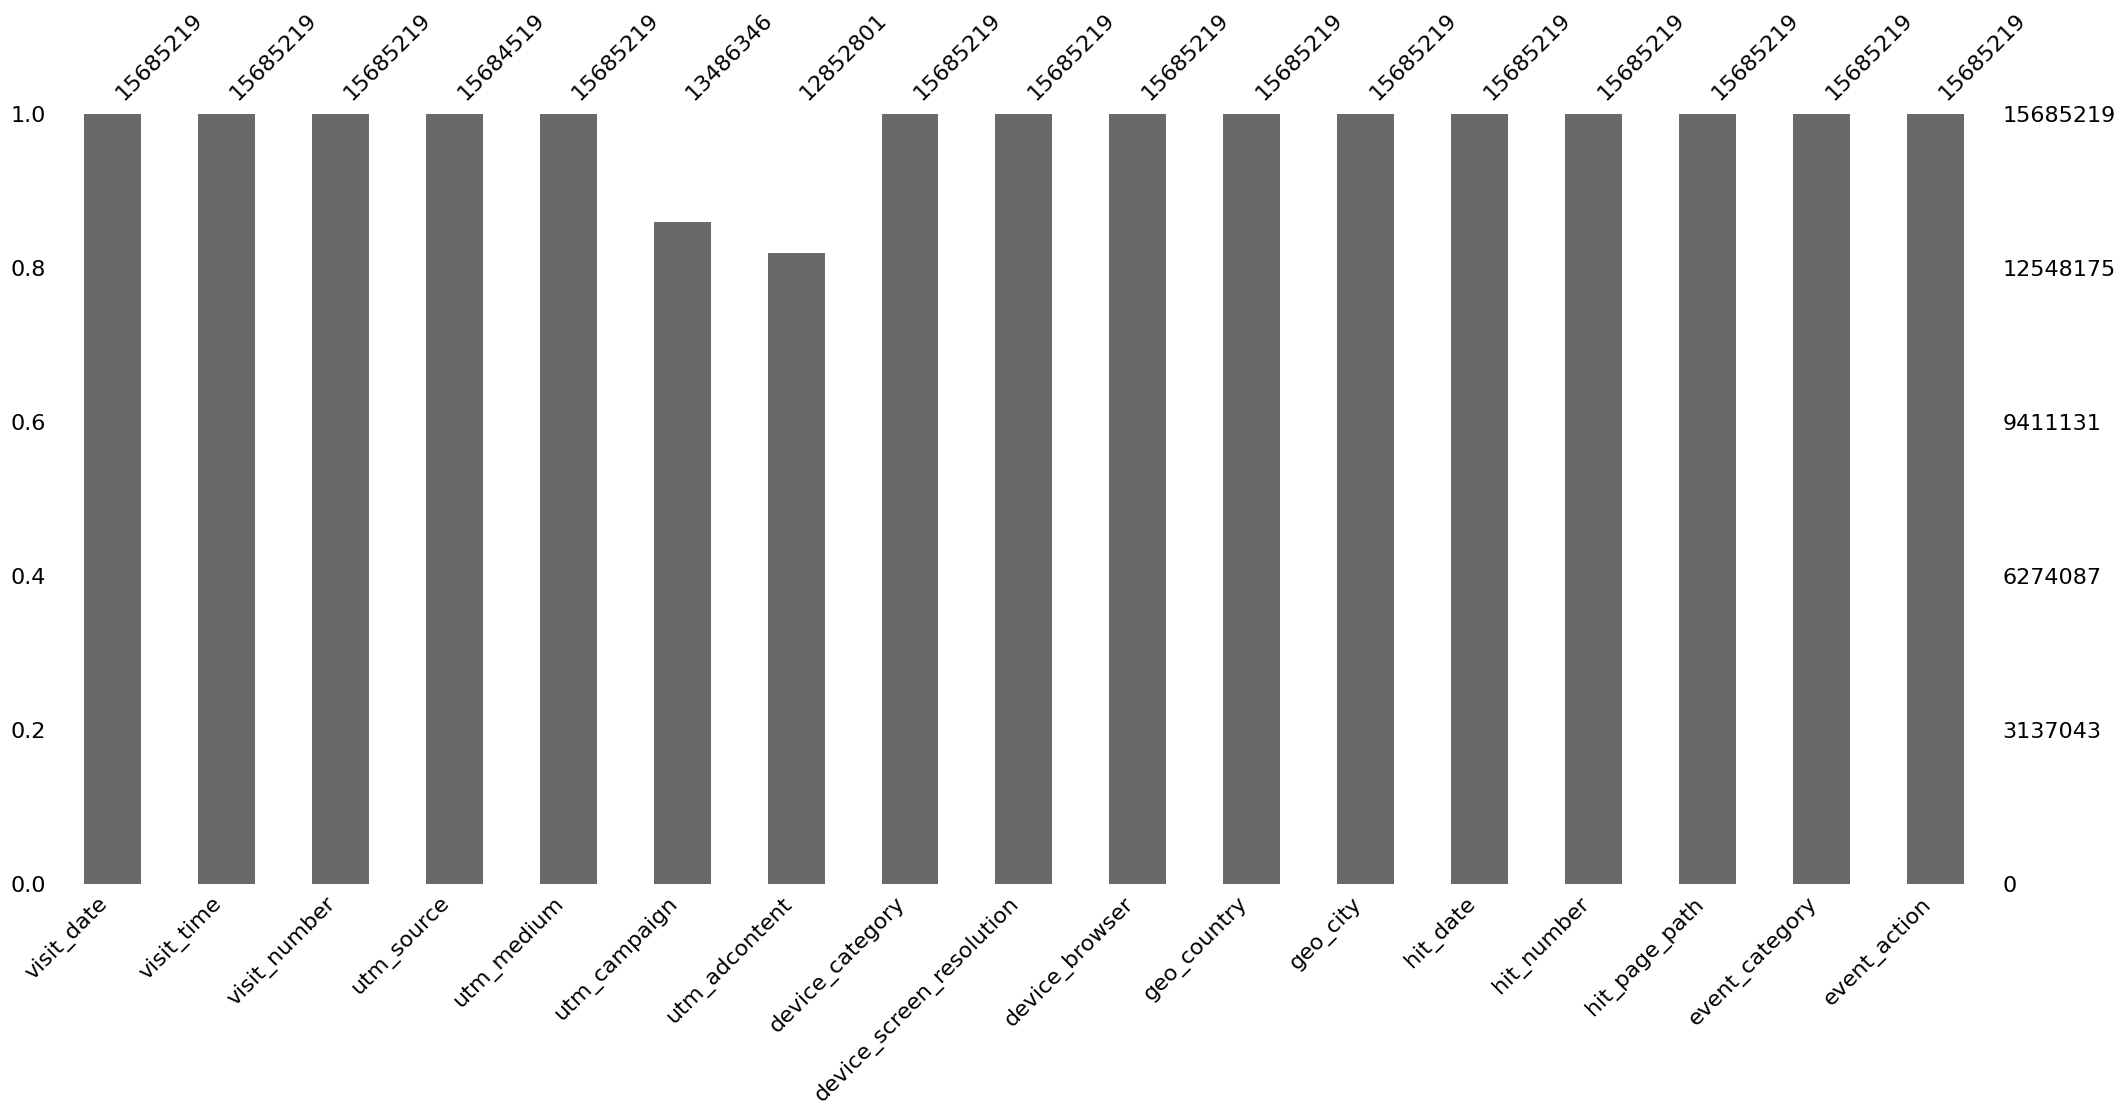

In [46]:
# диаграмма заполненности
msno.bar(df_united_clean)

<Axes: >

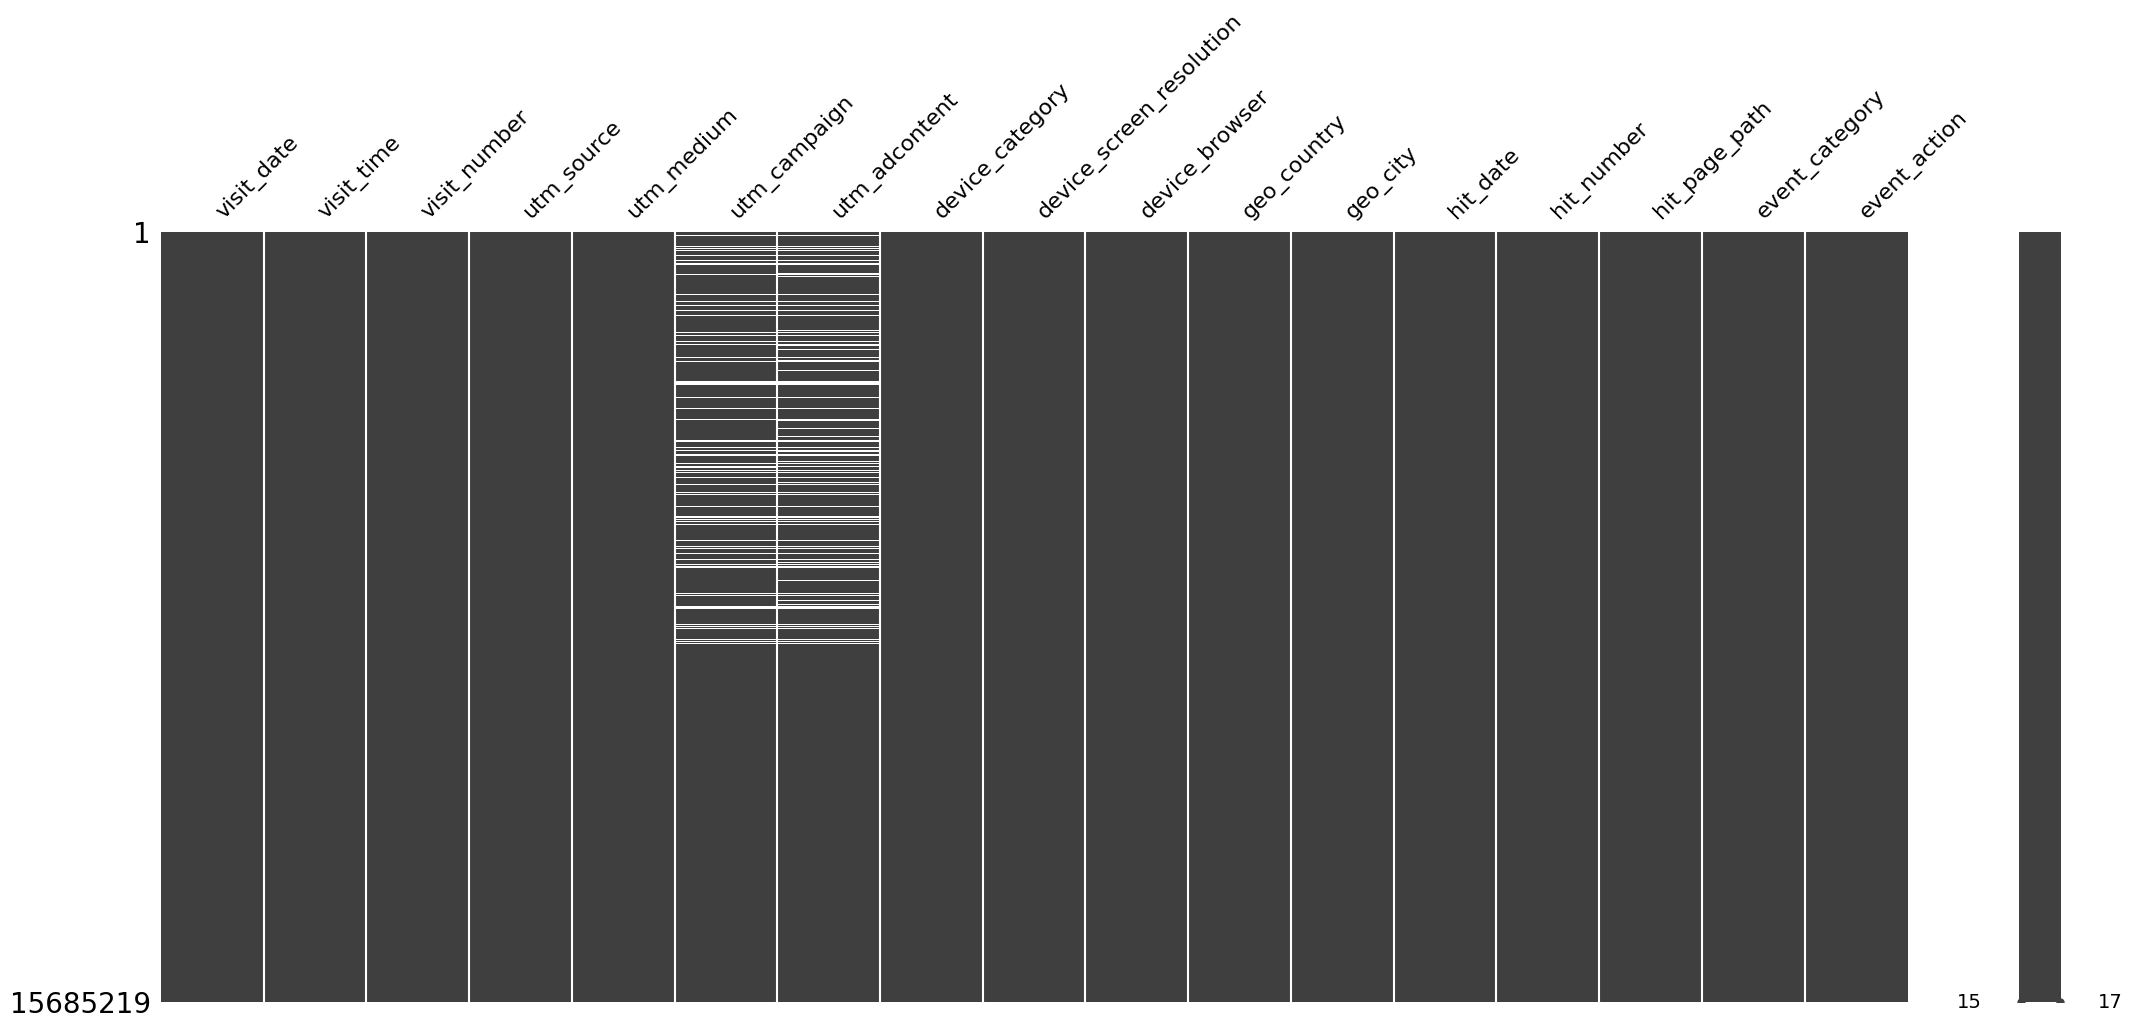

In [47]:
# матрица заполненности
msno.matrix(df_united_clean)

### Определение типов переменных в датасете df_united

|  Переменная               | Дискретная | Непрерывная | Качественная |
|---------------------------|------------|-------------|--------------|
| visit_date                | X          |             |              |
| visit_time                | X          |             |              |
| visit_number              | X          |             |              |
| utm_source                |            |             | X            |
| utm_medium                |            |             | X            |
| utm_campaign              |            |             | X            |
| utm_adcontent             |            |             | X            |
| device_category           |            |             | X            |
| device_screen_resolution  | X          |             |              |
| device_browser            |            |             | X            |
| geo_country               |            |             | X            |
| geo_city                  |            |             | X            |
| hit_date                  | X          |             |              |
| hit_number                | X          |             |              |
| hit_page_path             |            |             | X            |
| event_category            |            |             | X            |
| event_action              |            |             | X            |

In [51]:
df_united_clean.utm_adcontent.nunique()

280

In [55]:
df_united_clean.utm_campaign.unique()

array(['LEoPHuyFvzoNfnzGgfcd', 'FTjNLDyTrXaWYgZymFkV', nan,
       'LTuZkdKfxRGVceoWkVyg', 'gecBYcKZCPMcVYdSSzKP',
       'eimRuUrNhZLAYcwRrNXu', 'LwJZxKuWmvOhPsaCeRjG',
       'okTXSMadDkjvntEHzIjp', 'MXqmDyetMTICSSitTjWV',
       'PXQWdUxeUoXfoKzTBGpY', 'zxoiLxhuSIFrCeTLQVWZ',
       'nSReTmyFtbSjlPrTKoaX', 'BVKxkCOHKUOvkpbrLMgZ',
       'QEejXfOCtOMFLZqIPApp', 'kVOrIKZFrEYGvixPclal',
       'XHNUiSKKGTEpSAlaVMFQ', 'foFTSdUvNqqkPzZvgiqt',
       'SgIUDYUKnyWHVowUOqid', 'BAZCuyHZnaPrMGOMrcCQ',
       'bxOTvPtyGSdUrbwoXCPO', 'DXVdsSTQphSYVmRchYKt',
       'GWZGdHKPgmZPNPwkJshU', 'JwYIveaHVpeeRZloQCfF',
       'VBmazutCflYumtDHrQYe', 'UvuMsOSDBWQGOIbDbXfV',
       'RoDitORHdzGfGhNCyEMy', 'TmThBvoCcwkCZZUWACYq',
       'sbJRYgVfvcnqKJNDDYIr', 'XGYOaJEasWTwAKNdCGVX',
       'dMIPlIFgKzafYgowsqtp', 'EvhrtRzIJnQYHziPiLzV',
       'AqudXfUnmXWSDWVGYaXr', 'RxecHElWobBxIeAkqFXV',
       'hkvDVxqLOzGjGaoNiNzN', 'QdLfySaGXolfTBSNVfHn',
       'ULAUPJGgNiZYQgwZwZGR', 'JajANoFxoqXfKRNBUhzx',
     

In [56]:
df_united_clean.event_action.unique()

array(['sub_landing', 'sub_view_cars_click', 'search_form_region',
       'quiz_show', 'search_form_search_btn', 'view_card', 'sub_car_page',
       'view_new_card', 'quiz_start', 'search_kpp', 'search_drive',
       'chat requested', 'go_to_car_card', 'chat established',
       'listing_ads_sort', 'search_form_rental', 'search_form_cost_to',
       'search_form_cost_from', 'search_steering_wheel',
       'proactive invitation shown', 'proactive invitation accepted',
       'user gave contacts during chat',
       'search_form_search_car_type_select', 'view_more_click',
       'sub_offer_click', 'sub_footer_link_click', 'start_auth',
       'show_phone_input', 'go_to_terms', 'search_form_mark_select',
       'photos_all', 'showed_number_ads', 'search_form_model_select',
       'search_form_model_multiselec', 'greenday_get_gift',
       'pagination_click', 'search_form_year_from', 'photos',
       'go_to_offer', 'sub_header_link_click', 'click_on_logo',
       'search_form_modification_

In [57]:
df_united_clean.event_category.unique()

array(['sub_page_view', 'sub_button_click', 'search_form', 'quiz',
       'card_web', 'jivosite', 'listing_ads', 'cars', 'auth', 'footer',
       'greenday_sub_button_click', 'offers', 'navigation',
       'sap_search_form', 'sub_submit', 'ad_banner', 'active_invitation',
       'chat', 'sap_search__form', 'main_banners', 'greenday_listing_ads',
       'profile_menu', 'my_idea', 'scrolling_main_page', 'category_tile',
       'header', 'greenday_sub_submit', 'greenday_gtm.triggergroup',
       'add_ad', 'phone', 'main_services', 'credit_landing_pos',
       'main_advantages', 'greenday_card_web', 'wallet', 'add_ad_vin',
       'tesla', 'add_ad_options', 'add_ad_price', 'add_ad_city',
       'add_ad_additional_information', 'add_ad_documents',
       'add_ad_description', 'add_ad_photo', 'add_ad_publish_success',
       'add_ad_preview', 'greenday_sub_page_view', 'credit_buttons',
       'add_ad_form', 'pos_landing', 'app_banner', 'titul_form'],
      dtype=object)